# Final Project - Penguins 

### Group Members: Shreya Singh, Aryan Nahal

## Group Contributions Statement

Both of us wrote the data import and cleaning.

Aryan created the table of penguins grouped by species and island, and the scatterplot of Carbon and Nitrogen Isotopes in the bloodstream and wrote the analyses of those graphs. Shreya created the histogram of Penguin Body Mass and the grouped bar graph of Average Flipper Length by Sex and Species and wrote the analyses of those graphs.

Aryan did the feature selection and modeling of the Logistic Regression model. Shreya did the feature selection and modeling of the Random Forest Classfier. We wrote the analyses of the functions for modeling and feature selection that were used in each of our anaylsis together.

We worked together on the final discussion of our models and also we all checked each other's work and made revisions to code and writing.

## Data import and cleaning

In [245]:
#import all necessary libraries and functions
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

#setting random seed to be able to replicate 
np.random.seed(1234)

In [246]:
#import penguins and split data into training and testing
penguins = pd.read_csv("palmer_penguins.csv")
trainSet, testSet = train_test_split(penguins)


In [247]:
def cleanData(data):
  """
  Clean data by selecting columns that are useful in examining and dropping all rows with NAN in the selected columns. 
  Columns that are deemed not useful are for example 'Study Name', 'Sample Name', 'Clutch Completion', etc. Essentially,
  all columns that are not essential data.

  Input:
  data (pd.DataFrame): unclean data
 
  Output:
  clean_data (pd.DataFrame): data with selected columns to study and all rows remaining with NAN values removed
  """
  clean_data = data[["Species", "Flipper Length (mm)", "Body Mass (g)", "Sex", "Culmen Length (mm)", "Culmen Depth (mm)","Island", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]]
  clean_data = clean_data.dropna()
  clean_data = clean_data[clean_data["Sex"] != "."]
  return clean_data

In [248]:
# clean training and testing data
trainSet = cleanData(trainSet)
testSet = cleanData(testSet)

## Exploratory Analysis

### Penguins Grouped by Species and Island Table

In [249]:
#create a total column to help sum penguins by species and island
trainSet["total"] = 1
islandTable = trainSet.groupby(["Species", "Island"])[["total"]].sum()
islandTable

total
Species                                   Island          
Adelie Penguin (Pygoscelis adeliae)       Biscoe        30
                                          Dream         37
                                          Torgersen     35
Chinstrap penguin (Pygoscelis antarctica) Dream         48
Gentoo penguin (Pygoscelis papua)         Biscoe        91

#### Significance of Table
From the table we can see that the entire population of Chinstrap penguins from the training data are in only one island, Biscoe, and make up approximately 75% of the population of the island. Similarly, all Gentoo penguins from the training data are also entirely in one island, Biscoe, however they make up approximately 60% of the population of the island. One last important aspect from the table is that every penguin from the Torgersen island was of the species Adelie which is very useful. Hence understanding the island from which the penguin is from iis very helpful in determining which species a penguin is.

### Carbon v. Nitrogen Isotopes in Penguin BloodStream ScatterPlot

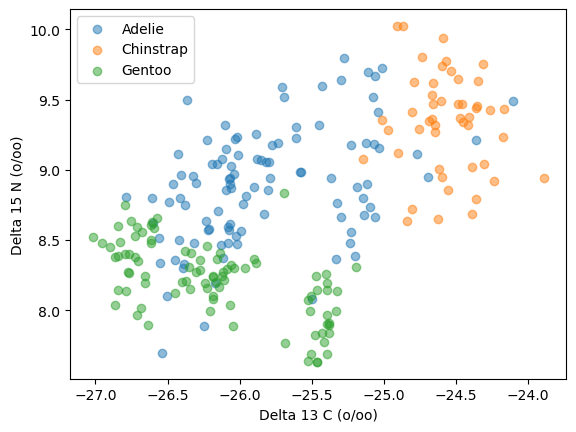

In [250]:
#create fig and ax for scatterplot
fig1, ax1 = plt.subplots(1)

#label x and y axis
ax1.set(xlabel = "Delta 13 C (o/oo)",
       ylabel = "Delta 15 N (o/oo)")

#all types of species to loop through and plot
PenguinSet = ["Adelie Penguin (Pygoscelis adeliae)", "Chinstrap penguin (Pygoscelis antarctica)","Gentoo penguin (Pygoscelis papua)"]

#plot the carbon and nitrogen data for each species type
for i in PenguinSet:
    OnlyOneSpecies = trainSet.loc[trainSet["Species"] == i]
    ax1.scatter(OnlyOneSpecies["Delta 13 C (o/oo)"], OnlyOneSpecies["Delta 15 N (o/oo)"], label = i.split(' ', 1)[0], alpha = 0.5 )

ax1.legend()


#### Significance of Scatterplot

From the scatterplot we see there are specific regions where a specific species peaks for certain carbon and nitrogen levels. For example, we see that the Gentoo penguins typically have lower Nitrogen and Carbon levels in their bloodstreams so they tend to be in the lower left part of the plot, Chinstrap penguins have the highest Nitrogen and Carbon levels on average and cluster in the top right. While the Adelie pengiuns tends to cluster in the middle. This is important to see as knowing the carbon and nitrogen blood level can provide a very good idea of what species it is. 

### Histogram of Penguin Body Mass

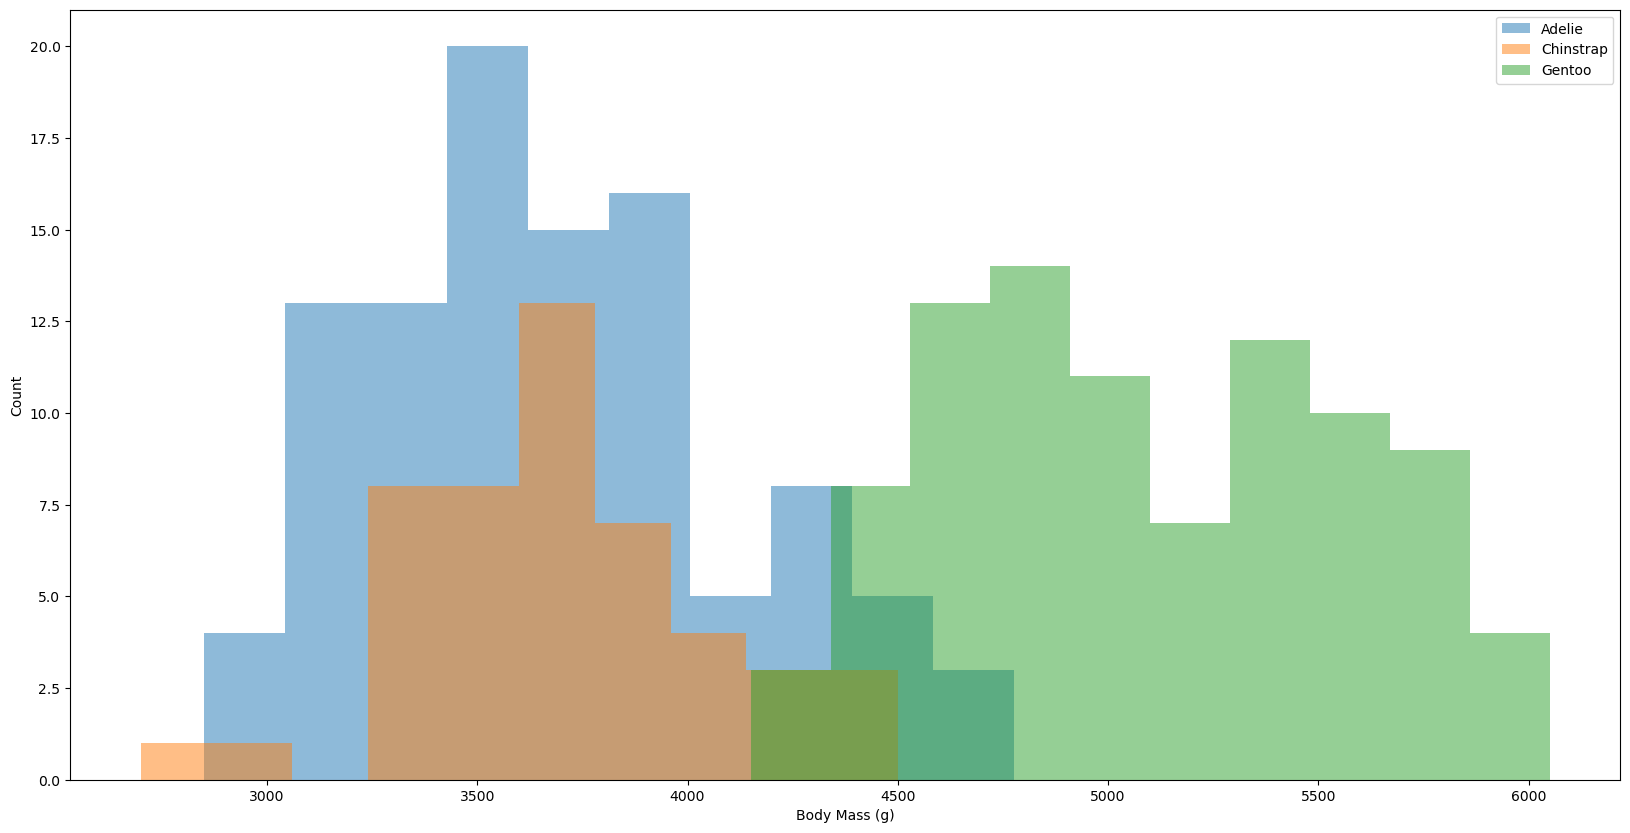

In [251]:
#create fig and ax for histogram
fig1, ax1 = plt.subplots(1,1, figsize=(20,10))
#label a and y axis
ax1.set(xlabel = "Body Mass (g)",
       ylabel = "Count")

#plot body mass denisty by penguins species
for i in PenguinSet:
  OnlyOneSpecies = trainSet.loc[trainSet["Species"] == i]
  ax1.hist(OnlyOneSpecies["Body Mass (g)"], alpha = 0.5, label = i.split())

ax1.legend()

#### Significance of Body Mass Histogram

This histogram shows the spread of the body mass of penguins across species. It is evident in the graph that the Gentoo penguins (green) generally weigh more than the other two species of penguins. This can be useful in modeling because the Body Mass of the penguins can be used to at least differentiate the Gentoo penguins from the other two species. However, between Adelie and Chinstrap penguins the overlap in their body mass is not noticeably different, so it may be hard to use body mass as a model measurement between those two species.


### Bar Graph of Penguin Flipper Length by Sex

[Text(0.5, 1.0, 'Average Flipper Length by Sex and Species'),
 Text(97.85166170634922, 0.5, 'Average Flipper Length (mm)'),
 Text(0.5, 28.999999999999993, 'Sex')]

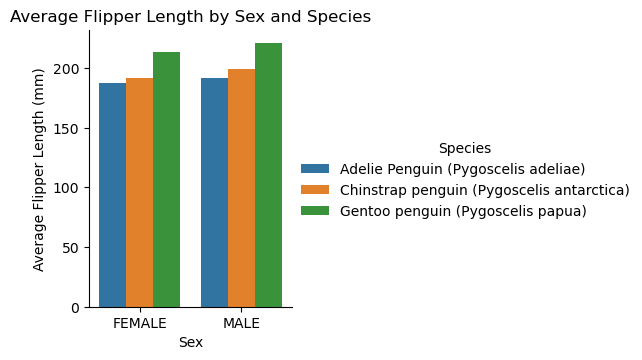

In [252]:
#group training set flipper length data by species and sex
grouped = trainSet.groupby(["Sex", "Species"])[["Flipper Length (mm)"]].mean().reset_index()

#plot bar graph of grouped data
fig = sns.catplot(data=grouped,
                  y="Flipper Length (mm)",
                  x="Sex",
                  hue="Species",
                  kind="bar",
                  height=3.5)

#label a and y axis of bargraph
fig.axes[0][0].set(title="Average Flipper Length by Sex and Species",
                   ylabel="Average Flipper Length (mm)",
                   xlabel="Sex")

#### Signficance of Bar Chart

This graph shows the Average Flipper Length of the penguins grouped by Sex and Species. The Gentoo penguins have a noticeably higher average flipper length than the other two species, so the model can use a high flipper length as a factor to identify Gentoo penguins. Additionally, the Adelie and Chinstrap penguins do have a small difference in average flipper length, which the model may be able to use.

## Feature Selection

For feature selection for both of our models we used automated feature selection. First we created a list of all the possible combinations of one qualitative and two quantitative features. Then we processed our data by encoding all the categorical values as integers and splitting the data into test and train sets. Finally we ran our model (Logistic Regression or Random Forest Classifier) on every possible combination and returned the cross validation score. We used the combination of features with the highest cross validation score as the features in our final models.

In [253]:
#create all possible combinations of 1 qualitative and 2 quantitative features and store in col_combs
qual_cols = ["Island", "Sex"]
quant_cols = ["Flipper Length (mm)", "Body Mass (g)", "Culmen Length (mm)", "Culmen Depth (mm)","Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]

col_combos = []

for q in qual_cols:
    for i in range(len(quant_cols)):
        for j in range(i + 1, len(quant_cols)):
            col_combos.append([q, quant_cols[i], quant_cols[j]])

In [254]:

def fs_preprocess(data):
  """
  take in set of data and transform the qualitative data into quantitative data that can be read by models. Then split data into X and y where X is independent variables and dependent varaiable

  Inputs:
  data (pd.DataFrame): panda data that needs to change its qualitative data columns to quantitative values and split into X and y

  Outputs:
  X_data (pd.DataFrame): transformed data that holds all independent variables to be used to predict species
  y_data (np.array): transformed data that holds species column which is now quantitative
  """
  # Adjusting the data so all columns are integers, no more strings
  le = preprocessing.LabelEncoder()
  data['Island'] = le.fit_transform(data['Island'])
  data['Sex'] = le.fit_transform(data['Sex'])
  data['Species'] = le.fit_transform(data['Species'])

  #Splitting data into X (independent variables) and y (dependent variable)
  X_data = data.drop(['Species'], axis=1)
  y_data = data['Species']

  return [X_data, y_data]

In [255]:
X_train = fs_preprocess(trainSet)[0]
y_train = fs_preprocess(trainSet)[1]

X_test = fs_preprocess(testSet)[0]
y_test = fs_preprocess(testSet)[1]

In [256]:
def check_column_score(model, cols):
  """
 Trains and evaluates a model via cross validation on the selected columns
  of data.

  Args: 
    model (classifier): The ML model being evaluated.
    cols (list): A list of columns/features to be used to train the model. 

  Returns:
    float: The mean cross validation score of the model. 

    The function: 
      1. Uses the specified columns from the training data to train the model.
      2. Runs cross validation on the model. 
      3. Returns the mean cross validation score. 
  """
  return cross_val_score(model, X_train[cols], y_train, cv = 5).mean()


### Feature Selection for Random Forest Classifier

In [257]:
#Creates an empty value to hold the best crossvalidation score and the features which result in that best score.
bestCV = 0
bestCols_RFC = []

#Creates a Random Forest Classifier Model.
RFC = RandomForestClassifier()

#Runs a for loop which iterates through every possible qualitative variable and 2 quantitative variable combination (col_combos) and checks the model's cross validation score.
for cols in col_combos:
  x = check_column_score(RFC, cols)
  #Retains the best cross validation score and the features that were used on the model to get that score.
  if(x>bestCV):
    bestCV=x
    bestCols_RFC=cols

print('BEST CV SCORE:', bestCV, "with columns", bestCols_RFC)

BEST CV SCORE: 0.9834183673469388 with columns ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']


In [258]:
X_train_RFC = X_train[bestCols]
X_test_RFC = X_test[bestCols]

### Feature Selection for Logistic Regression

In [259]:
#Creates an empty value to hold the best cross validation score and the features which result in that best score.
bestCV = 0
bestCols_LR = []

#Creates a Logistic Regression Model.
LR = LogisticRegression()

#Runs a for loop which iterates through every possible qualitative variable and 2 quantitative variable combination (col_combos) and checks the model's cross validation score.
for cols in col_combos:
  x = check_column_score(RFC, cols)
   #Retains the best cross validation score and the features that were used on the model to get that score.
  if(x>bestCV):
    bestCV=x
    bestCols_LR=cols

print('BEST CV SCORE:', bestCV, "with columns", bestCols_LR)

BEST CV SCORE: 0.9917517006802722 with columns ['Sex', 'Body Mass (g)', 'Culmen Length (mm)']


In [260]:
X_train_LR = X_train[bestCols]
X_test_LR = X_test[bestCols]

## Modeling

### Hyperparameter Selection

#### Hyperparameter Selection for Logistic Regression

In [261]:
parameters = {
    'solver': ['lbfgs', 'sag', 'saga'],
    'tol': [ 1e-2, 1e-3],
    'C': [ 0.5, 1, 2],
    'max_iter': [100000, 1000000]
}

# Initialize the RandomForestClassifier
LR = LogisticRegression()

# Perform GridSearchCV to find the best hyperparameters
grid_search_LR = GridSearchCV(estimator=LR, param_grid=parameters, cv=5, n_jobs=-1, verbose=2)
grid_search_LR.fit(X_train, y_train)

# Get the best parameters and train the model with them
best_params = grid_search_LR.best_params_
print(f'Best parameters found: {best_params}')

# Train the model with the best parameters
LR_best = LogisticRegression(**best_params)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found: {'C': 0.5, 'max_iter': 100000, 'solver': 'lbfgs', 'tol': 0.01}


#### Hyperparameter Selection for Random Forest Classifier

In [262]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
RFC = RandomForestClassifier()

# Perform GridSearchCV to find the best hyperparameters
grid_search_RFC = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_RFC.fit(X_train, y_train)

# Get the best parameters and train the model with them
best_params = grid_search_RFC.best_params_
print(f'Best parameters found: {best_params}')

# Train the model with the best parameters
RFC_best = RandomForestClassifier(**best_params)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


### Scoring Models

In [265]:
#Logisitc Regression
LR_best.fit(X_train_LR, y_train)

print("Training score is ", LR_best.score(X_train_LR, y_train), " for LR Model.")
print("Testing score is ", LR_best.score(X_test_LR, y_test), " for LR Model.")

Training score is  0.983402489626556  for LR Model.
Testing score is  0.9397590361445783  for LR Model.


In [266]:
#Random Forest Classifier
RFC_best.fit(X_train_RFC, y_train)

print("Training score is ", RFC_best.score(X_train_RFC, y_train), " for RFC Model.")
print("Testing score is ", RFC_best.score(X_test_RFC, y_test), " for RFC Model." )

Training score is  1.0  for RFC Model.
Testing score is  0.9759036144578314  for RFC Model.


### Confusion Matrix

#### Confusion Matrix for Logistic Regression

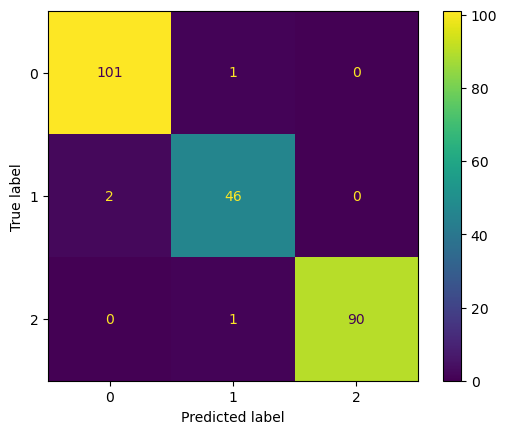

In [267]:
# Predict on the test set
y_train_pred = LR_best.predict(X_train_LR)

# Generate and display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

#### Confusion Matrix for Random Forest Classifier

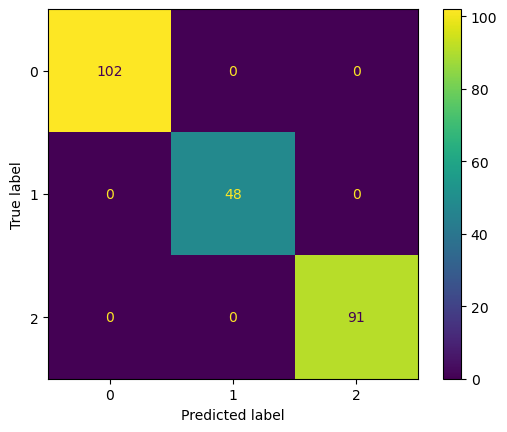

In [268]:
# Predict on the test set
y_pred = RFC_best.predict(X_train_RFC)

# Generate and display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

### Decision Regions

In [269]:
def plot_regions(c, X, y, bestCols, qual_Category):
  """
   Creates a decision region plot based on the given classification model. 

  Args: 
    c (classifier): The trained classifier used for making predictions.
    X (pd.DataFrame): The input data containing the feature columns.
    y (np.ndarray): The target labels.
    bestCols (list): A list of feature names where bestCols[1] and bestCols[2] are the quantitative features that will be plotted.
    qual_Category (str): The qualitative feature being analyzed.

  Returns: 
    None. 

    The function:
      1. Takes two features quantitative features from the input data based on bestCols.
      2. Creates a grid of values for these features.
      3. Predicts the y labels (species) for each point in the grid.
      4. Plots the decision regions using a contour plot.
      5. Plots the actual data points on the same plot.
      6. Adds labels, a title, and a color coded legend to the plot.

    The plot displays the decision boundaries learned by the classifier along with the actual data points color-coded by their labels.
  """

  quantOne = bestCols[1]
  quantTwo = bestCols[2]

  # for convenience, give names to the two columns of the data
  x0 = X[quantOne]
  x1 = X[quantTwo]

  # create a grid
  grid_x = np.linspace(x0.min(),x0.max(),501)
  grid_y = np.linspace(x1.min(),x1.max(),501)
  xx, yy = np.meshgrid(grid_x, grid_y)

  # extract model predictions, using the np.c_ attribute to join together the two parts of the grid.
  # array.ravel() converts an multidimensional array into a 1d array, and we use array.reshape() to turn the resulting predictions p back into 2d
  XX = xx.ravel()
  YY = yy.ravel()

  #creates array same shape and type as XX but filled with qual values

  XY = pd.DataFrame({
      quantOne : XX,
      quantTwo : YY
      })

  p = c.predict(XY)
  p = p.reshape(xx.shape)

  # create the plot
  fig, ax = plt.subplots(1)
  # use contour plot to visualize the predictions
  ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
  # plot the data
  scatter = ax.scatter(x0, x1, c = y, cmap = "jet", vmin = 0, vmax = 2)
  
   
  ax.set(xlabel = quantOne,
  ylabel = quantTwo,
  title = f"Decision Regions for {bestCols[0]} = {qual_Category}")

  # define species labels and colors
  species_labels = ["Adelie", "Chinstrap", "Gentoo"]

  # manually create legend
  colors = ["blue", "green", "red"]  # specify colors for each species
  handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=species) for i, species in enumerate(species_labels)]
  ax.legend(handles=handles, title="Species")

#### Decision Regions for Logisitic Regression

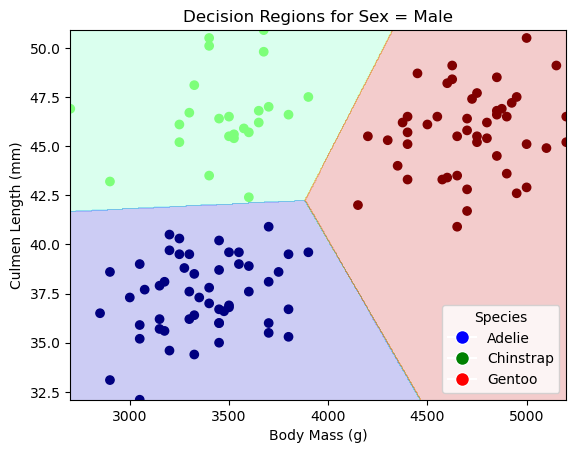

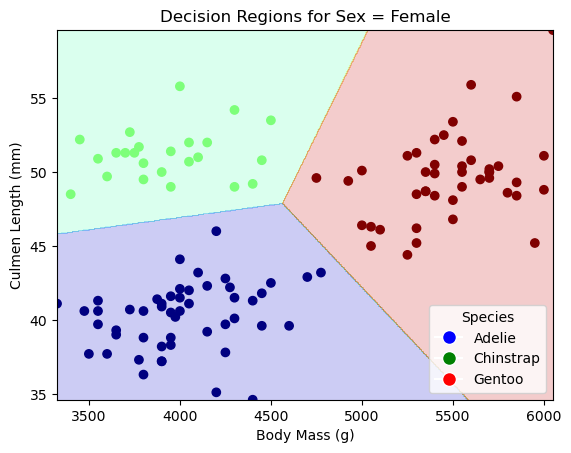

In [270]:
#First check if Sex or Island is being used as qualitative measure, to help with understanding graph titles and how many graphs
qual_groups=[]
if(bestCols_LR[0]=='Sex'):
    qual_groups = ["Male", "Female"]
else:
    qual_groups = ["Biscoe", "Dream","Torgensen"]

#for each unique qualitative type create an individual decision region graph that creates a contour and scatterplots the training data
for i in range(len(np.unique(trainSet[bestCols_LR[0]]))):
    #extract all rows of trainset for which the qualitative type is equal to the one being tested in loop
    trainSet_temp = trainSet.loc[trainSet[bestCols_LR[0]]==np.unique(trainSet[bestCols_LR[0]])[i]]
    #split into independent and dependent sets
    X_DecisionTrain = trainSet_temp[bestCols_LR[1:3]]
    y_DecisionTrain = trainSet_temp['Species']
    #fit the data into LR_best
    LR_best.fit(X_DecisionTrain[bestCols_LR[1:3]], y_DecisionTrain)
    #call plot_regions function
    plot_regions(LR_best, X_DecisionTrain, y_DecisionTrain, bestCols_LR, qual_groups[i])


#### Decision Regions for Random Forest Classifier

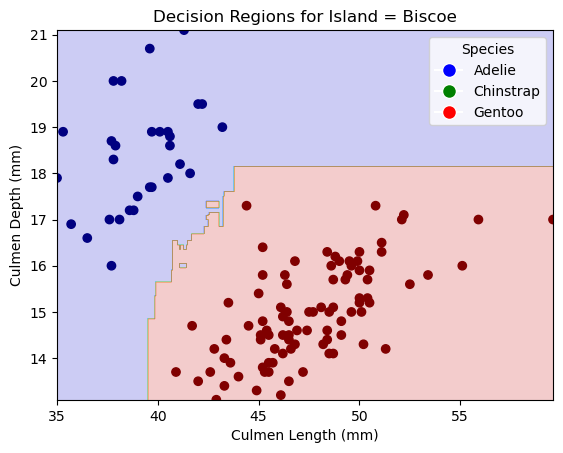

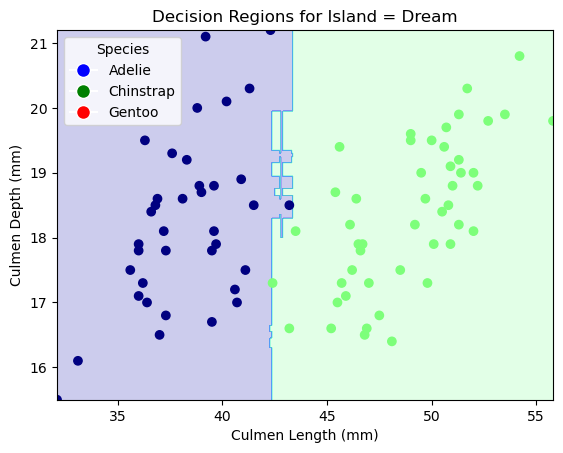

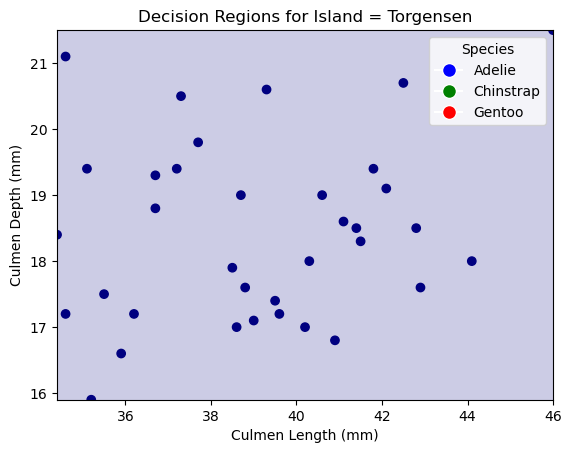

In [271]:
#First check if Sex or Island is being used as qualitative measure, to help with understanding graph titles and how many graphs
qual_groups = []
if(bestCols_RFC[0]=='Sex'):
    qual_groups = ["Male", "Female"]
else:
    qual_groups = ["Biscoe", "Dream","Torgensen"]

#for each unique qualitative type create an individual decision region graph that creates a contour and scatterplots the training data
for i in range(len(np.unique(trainSet[bestCols_RFC[0]]))):
    #extract all rows of trainset for which the qualitative type is equal to the one being tested in loop
    trainSet_temp = trainSet.loc[trainSet[bestCols_RFC[0]]== np.unique(trainSet[bestCols_RFC[0]])[i]]
    #split into independent and dependent sets
    X_DecisionTrain = trainSet_temp[bestCols_RFC[1:3]]
    y_DecisionTrain = trainSet_temp['Species']
    #fit the data into FRC_best
    RFC_best.fit(X_DecisionTrain[bestCols_RFC[1:3]], y_DecisionTrain)
    #call plot_regions function
    plot_regions(RFC_best, X_DecisionTrain, y_DecisionTrain, bestCols_RFC, qual_groups[i])


### Modeling Mistakes

#### Logistic Regression Model Possible Mistakes


The Logisitic Regression Model has a 0.98 percent accuracy with it's training data, but a 0.939 accuracy with the testing data. The mistakes that were caused during testing might have been caused by the fact that when a logisitic regression model is fitted, it tries to find the best fit predictor for the data with the percent probability of a species to be with given features. Hence there might be cases in the test that were slightly varying from the average data of the training data hence the predicting model failed to accurately precit the species of the penguin with the given features. 

This is why while the decision region graph looks to be all right based on the training data, the testing data could have outlying data that the model just failed to acurrately predict because it doensn't see it to be resonable. For example, in the Male decision region, the model creates the contours with some of the data being very close to the divide, so there is a could chance that within the testing data, there can be a case where the contour incorrectly predicts the right species. 


#### Random Forest Classifier Model Possible Mistakes

The RandomForestClassifer made mistakes on the training data in the decision region plot for the island "Dream". Along the edge of the border between the blue region (Adelie) and the green region (Chinstrap), there are two points almost exactly along the border. 

The model likely made a mistake on these points because these penguins most likely had Culmen Length and Depth that were not clearly in one species or another. The model struggled to identify these points because of the ambiguity and overlapping feature values across species.

For the island "Biscoe" there are no mistakes in the classification of the training data. The model most likely worked well for classifying Adelie vs Gentoo because there was more differentiation in the values of Culmen Length and Culem Depth between species.

For the island "Torgensen" the decision region is entirely blue because there were only Adelie penguins on that island. The model correctly identifies all penguins as Adelie, since there are only Adelie penguins on Torgensen.

Any other potential errors could be due to the model struggling in regions where the boundaries between the species are not well-defined due to overlapping features. The features may not be different enough to determine the boundary for certain data points. Additionally, every model has its limitations, in this case the Random Forest Classifier could be overfitting to some of the patterns in the data..

## Discussion

Overall the logistic regression model had an accuracy score of 0.939 when run with the features 'Sex', 'Body Mass (g)', and 'Culmen Length (mm)'. The random forest classifier had an accuracy score of 0.976 when run with the features 'Island', 'Culmen Depth (mm)', and 'Culmen Length (mm)'. We reccomend the the combination of the random forest classifier with the features 'Island', 'Culmen Depth (mm)', and 'Culmen Length (mm)' since this combination is what got us the highest accuracy score on unseen testing data. If more data was available the model could potentially have a higher accuracy score as it would have more training data to run off. New data may also significantly shift the decision region plots. For example, new data which shows species on Torgersen that are not Adelie penguins would significantly change the decision plot for that island. Additionally, if there were more data, some of the other model types (i.e. neural networks) might be more feasible.